# Лабораторная работа #1. Градиентный спуск
**Выполнили**: Бессонницын Евгений (M3234), Чеботарева Олеся (М3435), Фадеев Олег (M3235)


In [204]:
import numpy as np
import matplotlib.pyplot as plt
import math
from random import random

In [205]:
sin = np.vectorize(math.sin)
cos = np.vectorize(math.cos)
log = np.vectorize(math.log)
exp = np.vectorize(math.exp)

# temp
EPS = 1E-10 # "Машинный эпсилон"
FI = (math.sqrt(5.0) + 1.0) / 2.0 # a.k.a. Golden Ratio

Различные фукнции для выбора learning_rate

In [206]:
def generate_exponencial_learning_rate_rule(value, delta = 1):
    def rule(v = value):
        return v / delta
    return rule

def linear_learning_rate_rule(value, delta, least):
    return np.maximum(value - delta, least)

def generate_linear_learning_rate_rule(value, delta, least):
    def rule(v = value):
        return linear_learning_rate_rule(v, delta, least)
    return rule

def generate_linear_learning_rate_rule(value, delta):
    def rule(v = value):
        return linear_learning_rate_rule(v, delta, delta)
    return rule

def generate_constant_learning_rate_rule(value):
    def rule(v = value):
        return v
    return rule

def default_learning_rate_rule():
    return generate_constant_learning_rate_rule(0.05)

def funny(value = 0.1):
    return 2.7 ** (-value) / 5

def dummy(value = 2):
    return value / (0.85 + value)

Поиск градиента через разность фукнции в точках

In [207]:
def find_gradient(function, x_value):
  gradient = []
  x_plus_delta = x_value
  coefficient = 1 / (2 * EPS)
  for i in range(len(x_value)):
    x_plus_delta[i] = x_value[i] + EPS
    f_y = function(x_plus_delta)
    x_plus_delta[i] = x_value[i] - EPS
    f_z = function(x_plus_delta)
    gradient.append(coefficient * (f_y - f_z))
    x_plus_delta[i] = x_value[i]
  return gradient


## Градиентный спуск

In [208]:
def gradient_descent(
      f, 
      space, 
      start = [0, 0], 
      learning_rate_rule = default_learning_rate_rule, 
      iteration_limit = 50):
    learning_rate_value = learning_rate_rule()
    points = np.zeros((iteration_limit, 2))
    point = points[0] = start
    for i in range(1, iteration_limit):
        point = points[i] = point - learning_rate_value * np.array(find_gradient(f, point))
        learning_rate_value = learning_rate_rule(learning_rate_value)
    plt.rcParams['figure.figsize'] = (20, 10)
    plt.plot(points[:, 0], points[:, 1], 'o-')
    x, y = np.meshgrid(space, space);
    plt.contourf(x, y, f((x, y)), levels 
        = np.unique(sorted([f(p) for p in points])))

Разные функции для тестирования

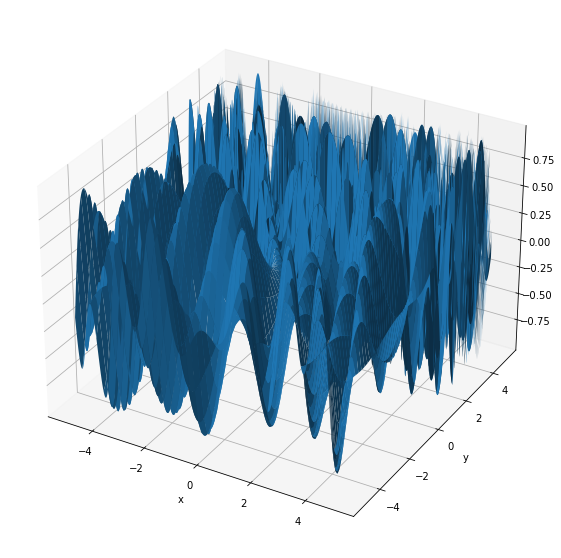

In [209]:
def h(point):
    x, y = point
    return x ** 2 / 2 - y ** 2 / 4 + 3

def w(point):
    x, y = point
    return 2 * x + 1 + exp(y)

def f(point):
    return sin(h(point)) * cos(w(point))

space = np.linspace(-5, 5, 2000)
x, y = np.meshgrid(space, space);

plt.rcParams['figure.figsize'] = (20, 10)
plot = plt.figure().add_subplot(projection="3d")
plot.set_xlabel('x')
plot.set_ylabel('y')
plot.plot_surface(x, y, f((x, y)))

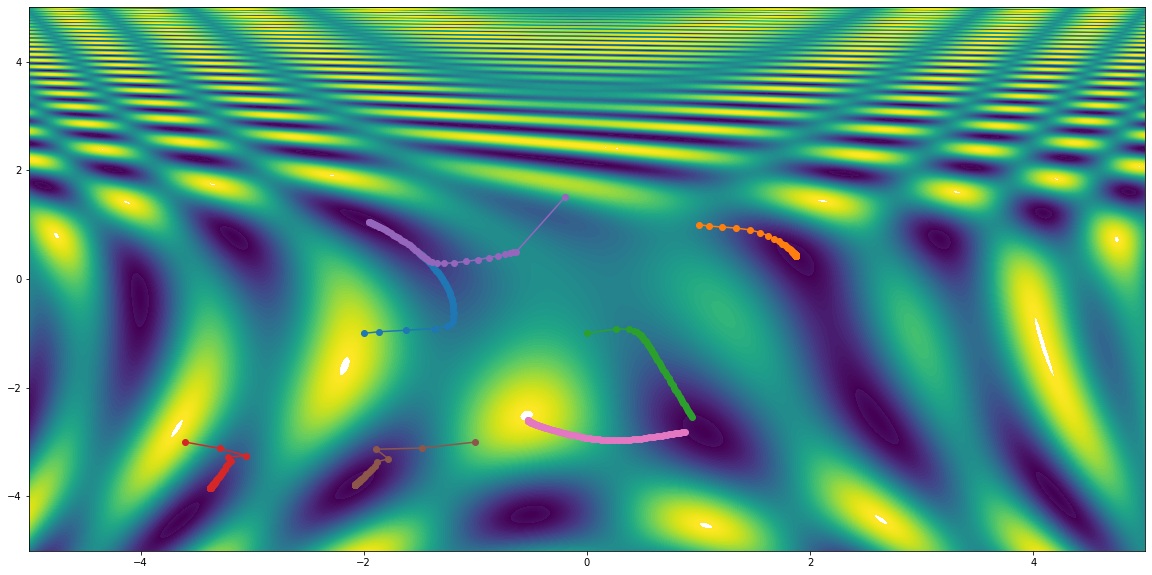

In [210]:
gradient_descent(f, space,
                 start=[-2, -1],
                 learning_rate_rule=generate_linear_learning_rate_rule(0.3, 0.005))
gradient_descent(f, space,
                 start=[1, 1],
                 learning_rate_rule=generate_constant_learning_rate_rule(0.2))
gradient_descent(f, space,
                 start=[0, -1],
                 learning_rate_rule=dummy)
gradient_descent(f, space,
                 start=[-3.6, -3],
                 learning_rate_rule=generate_exponencial_learning_rate_rule(0.3, 1.11))
gradient_descent(f, space,
                 start=[-0.2, 1.5],
                 learning_rate_rule=dummy)
gradient_descent(f, space,
                 start=[-1, -3],
                 learning_rate_rule=dummy)
gradient_descent(f, space,
                 [-0.53, -2.6],
                 generate_constant_learning_rate_rule(0.03),
                 100)

# Градиентный спуск методом золотого сечения


In [211]:
def gold_find(
      f, 
      left,                                              
      right,                                              
      iteration_limit = 50):
  for i in range(iteration_limit):
    x1 = right - (right - left) / FI
    x2 = left + (right - left) / FI
    if (f(x1) >= f(x2)):
      left = x1
    else:
      right = x2
  return (left + right) / 2.0

In [212]:
def sqr(x) : return (x - 2) * (x - 2);
print(gold_find(math.cos, 0, 6.28))
print(gold_find(sqr, -100, 100))
print(gold_find(lambda x: math.sin(math.cos(x)), -4, 4))

3.1415926640815286
1.9999999993924658
3.1415926641278906


In [213]:
def gradient_descent_with_gold_find(
      f, 
      space, 
      start = [0, 0], 
      iteration_limit = 50):
    points = np.zeros((iteration_limit, 2))
    point = points[0] = start
    for i in range(1, iteration_limit):
        def new_point_function(learning_rate_value):
          return point - learning_rate_value * np.array(find_gradient(f, point))
        def new_point_function_value(learning_rate_value):
          return f(new_point_function(learning_rate_value))
          
        point = points[i] = new_point_function(gold_find(new_point_function_value, -1, 1))

    plt.rcParams['figure.figsize'] = (20, 10)
    plt.plot(points[:, 0], points[:, 1], 'o-')
    x, y = np.meshgrid(space, space);
    plt.contourf(x, y, f((x, y)), levels 
        = np.unique(sorted([f(p) for p in points])))

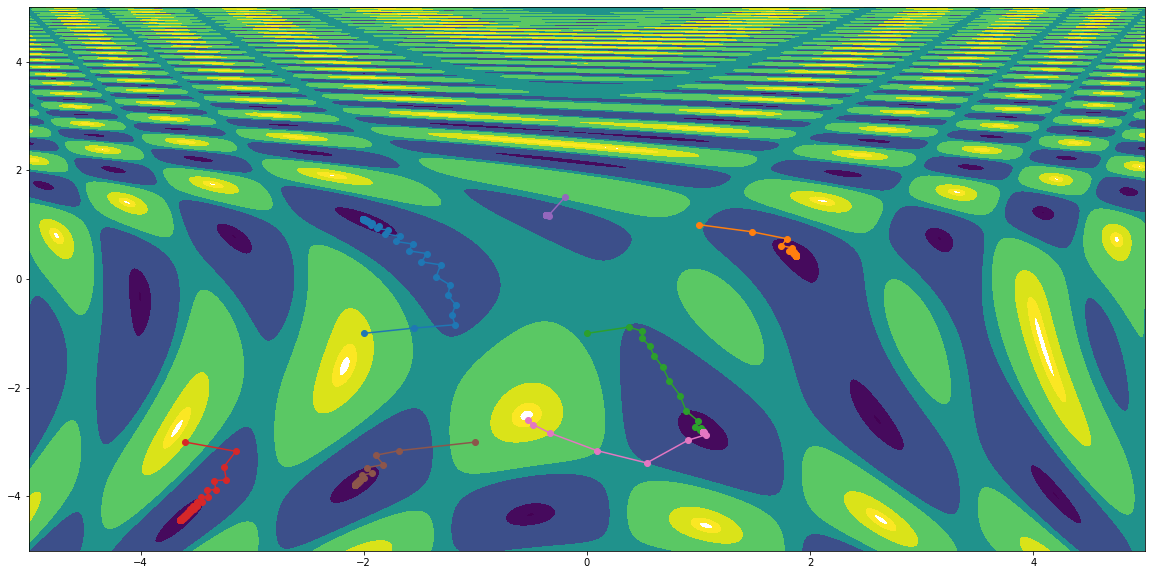

In [214]:
gradient_descent_with_gold_find(f, space,
                 start=[-2, -1])
gradient_descent_with_gold_find(f, space,
                 start=[1, 1])
gradient_descent_with_gold_find(f, space,
                 start=[0, -1])
gradient_descent_with_gold_find(f, space,
                 start=[-3.6, -3])
gradient_descent_with_gold_find(f, space,
                 start=[-0.2, 1.5])
gradient_descent_with_gold_find(f, space,
                 start=[-1, -3])
gradient_descent_with_gold_find(f, space,
                 [-0.53, -2.6],
                 100)

# Градиентный спуск с учётом условия Вольфе

In [215]:
C_1 = 1E-4
C_2 = 9E-1

def validate_fst_cond(f, x, a, dir):
  return f(x + a * dir) <= f(x) + C_1 * a * np.dot(find_gradient(f, x), dir)

def validate_snd_cond(f, x, a, dir):
  return np.dot(find_gradient(f, x + a * dir), dir) >= C_2 * np.dot(find_gradient(f, x), dir)

def validate_both_cond(f, x, a, dir):
    return validate_fst_cond(f, x, a, dir) and validate_snd_cond(f, x, a, dir)

"""
    Небольшая хитрость с использованием условия Вольфе - как только мы нашли подходящую точку - сразу её возвращаем.
"""
def gold_find_wolfe(f, x, left, right, dir, iter_limit):
    for i in range(iter_limit):
      x1 = right - (right - left) / FI
      x2 = left + (right - left) / FI
      if f(x + x1 * dir) >= f(x + x2 * dir):
        left = x1
      else:
        right = x2
      if (validate_both_cond(f, x, (left + right) / 2, dir)):
         return (left + right) / 2
    return (left + right) / 2 

def gradient_descent_with_gold_find_wolfe(
      f, 
      space, 
      start = [0, 0], 
      iteration_limit = 50):
    points = np.zeros((iteration_limit, 2))
    point = points[0] = start
    for i in range(1, iteration_limit):
        direction = -np.array(find_gradient(f, point))
        point = points[i] = point + direction * gold_find_wolfe(f, point, 0, 1, direction, 50)
    plt.rcParams['figure.figsize'] = (20, 10)
    plt.plot(points[:, 0], points[:, 1], 'o-')
    x, y = np.meshgrid(space, space);
    plt.contourf(x, y, f((x, y)), levels 
        = np.unique(sorted([f(p) for p in points])))


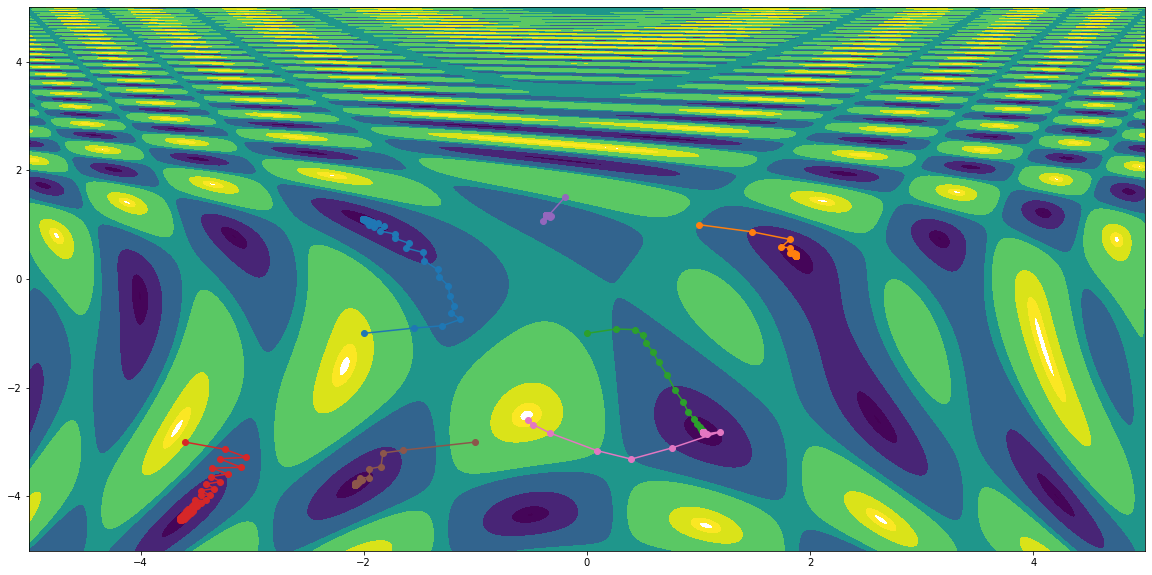

In [216]:
gradient_descent_with_gold_find_wolfe(f, space,
                 start=[-2, -1])
gradient_descent_with_gold_find_wolfe(f, space,
                 start=[1, 1])
gradient_descent_with_gold_find_wolfe(f, space,
                 start=[0, -1])
gradient_descent_with_gold_find_wolfe(f, space,
                 start=[-3.6, -3])
gradient_descent_with_gold_find_wolfe(f, space,
                 start=[-0.2, 1.5])
gradient_descent_with_gold_find_wolfe(f, space,
                 start=[-1, -3])
gradient_descent_with_gold_find_wolfe(f, space,
                 [-0.53, -2.6],
                 100)

# Простые функции с разным числом обусловленности

In [217]:
def sqrFunctionExample1(point):
    x, y = point
    return x ** 2 + y ** 2

def sqrFunctionExample2(point):
    x, y = point
    return 10 * x ** 2 + 10 * y ** 2

def sqrFunctionExample3(point):
    x, y = point
    return 100 * x ** 2 + 100 * y ** 2

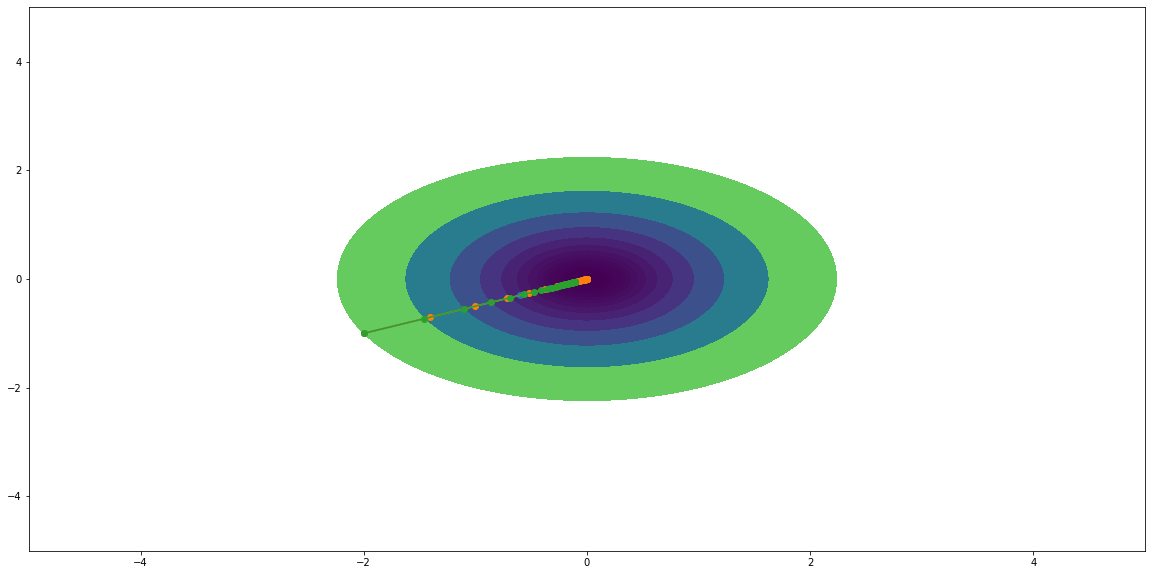

In [218]:
gradient_descent(sqrFunctionExample1, space,
                 start=[-2, -1],
                 learning_rate_rule=dummy)
gradient_descent(sqrFunctionExample1, space,
                 start=[-2, -1],
                 learning_rate_rule=generate_linear_learning_rate_rule(0.3, 0.005))
gradient_descent(sqrFunctionExample1, space,
                 start=[-2, -1],
                 learning_rate_rule=generate_exponencial_learning_rate_rule(0.3, 1.11))

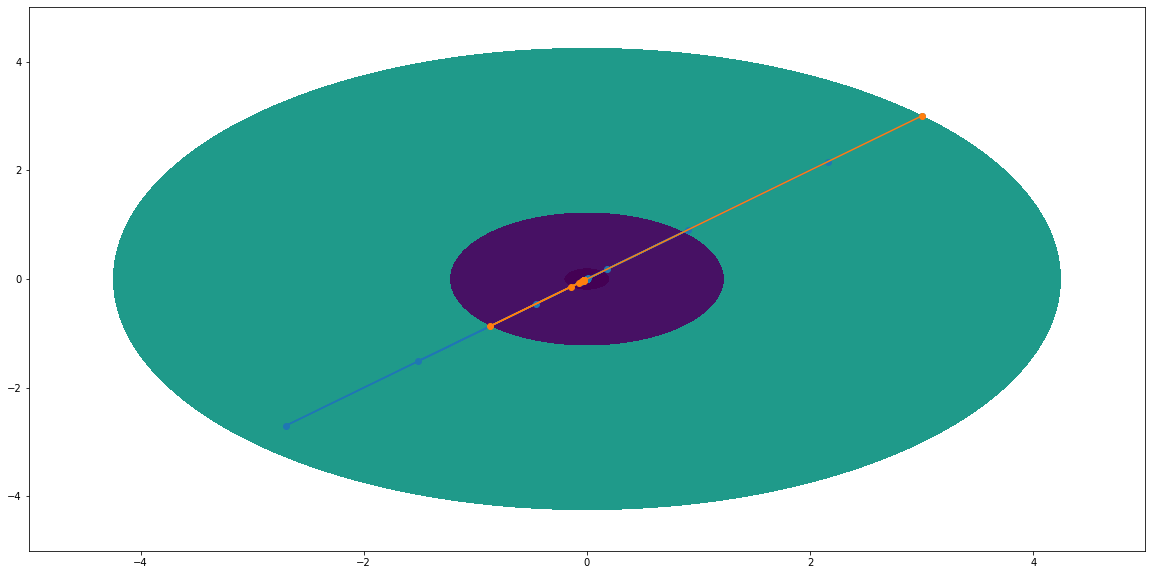

In [219]:
gradient_descent(sqrFunctionExample2, space,
                 start=[3, 3],
                 learning_rate_rule=generate_linear_learning_rate_rule(0.2, 0.01))
gradient_descent(sqrFunctionExample2, space,
                 start=[3, 3],
                 learning_rate_rule=generate_exponencial_learning_rate_rule(0.2, 1.55))

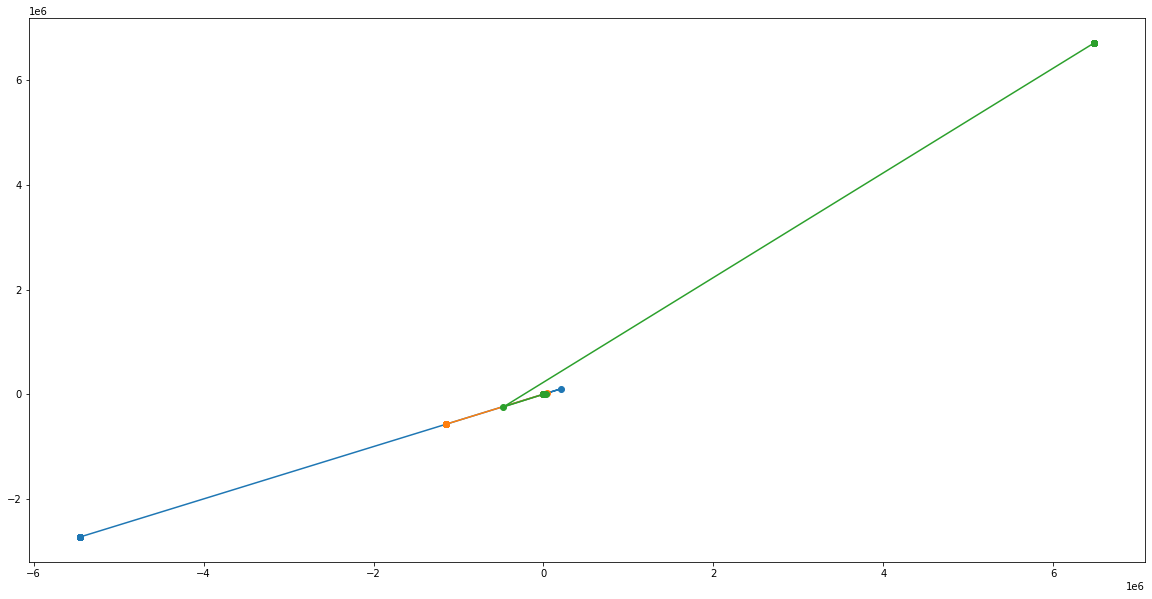

In [220]:
gradient_descent(sqrFunctionExample3, space,
                 start=[-2, -1],
                 learning_rate_rule=dummy)
gradient_descent(sqrFunctionExample3, space,
                 start=[-2, -1],
                 learning_rate_rule=generate_linear_learning_rate_rule(0.3, 0.005))
gradient_descent(sqrFunctionExample3, space,
                 start=[-2, -1],
                 learning_rate_rule=generate_exponencial_learning_rate_rule(0.3, 1.11))

## Ответ на вопрос №5
При высоком числе обусловленности происходит очень резкий скачок и наш метод начинает не сходиться, а при низком числе обусловленности алгоритм сходится довольно медленно и может потребоваться много итераций для поиска минимума.

Выбор начальной точки в квадратичной функции почти не влияет на направление спуска. Только на число обусловленности. Однако при рассмотрении функций с несколькими локальными минимума начальная точка играет важную роль: она определяет к какому из локальных минимумов будет сходиться алгоритм. 

Выбор стратегии шага влияет на скорость сходимости. При неудачной стратегии алгоритм может перестать сходиться или же сходиться очень медленно. А при выборе хорошей стратегии градиентный спуск находит минимум буквально за 10-15 итераций.